# Assignment1 

## Matrix 구현 
1. Linear Regression 에서 쓰이는 **정규방정식**을 행렬로 구현하고, sklearn 혹은 OLS 패키지를 통해 구한 **실제 값과 비교**해 주세요 
2. LSE에서 쓰이는 Loss Function, **MSE**를 행렬로 구현해 출력해 주세요 

### Data Load 

In [1]:
import pandas as pd 
data = pd.read_csv("assignment1.csv")

In [2]:
data.head()

,y,x1,x2,x3,x4,x5
0,10,38.9,64.7,4,868,59.7
1,13,41.6,45.3,-4,957,61.4
2,11,39.7,74.1,8,786,61.0
3,7,37.3,48.0,19,984,67.5
4,10,39.5,51.9,6,700,57.2


In [3]:
data.shape # y:(9,1), X:(9,5)

(9, 6)

In [4]:
X = data.drop(["y"], axis=1)
y = data.y

In [5]:
# matrix 계산을 위해 numpy 형태로 바꾸어 줍니다 
X = X.to_numpy()
y = y.to_numpy()

In [6]:
X

array([[  38.9,   64.7,    4. ,  868. ,   59.7],
       [  41.6,   45.3,   -4. ,  957. ,   61.4],
       [  39.7,   74.1,    8. ,  786. ,   61. ],
       [  37.3,   48. ,   19. ,  984. ,   67.5],
       [  39.5,   51.9,    6. ,  700. ,   57.2],
       [  37.4,   53.6,   -5. , 1037. ,   58.8],
       [  35.1,   71.4,    3. ,  986. ,   58.6],
       [  38.8,   58.3,    6. ,  819. ,   59.2],
       [  36.6,   52.6,  -19. ,  791. ,   54.4]])

In [7]:
y

array([10, 13, 11,  7, 10,  9,  9,  6,  5])

### 1. Normal Equation

In [8]:
import numpy as np
from numpy.linalg import inv 

In [9]:
designX = np.hstack((X, np.ones((X.shape[0],1))))
np.matmul(inv(np.matmul(designX.T , designX)), designX.T)

array([[ 4.29734602e-02,  1.32636250e-01,  3.60752826e-02,
        -1.12042675e-01,  2.06238165e-02,  3.19941955e-02,
        -5.15318422e-02,  1.90336818e-02, -1.19762170e-01],
       [ 1.01283207e-02, -2.72847982e-03,  2.95194120e-02,
        -1.21901357e-02, -2.11414900e-02, -6.31048235e-03,
         9.97801785e-03, -5.13822140e-03, -2.11694126e-03],
       [ 2.25180922e-03, -1.45003299e-02, -2.64855223e-02,
        -6.17159401e-03,  4.19610447e-02,  1.36603693e-02,
         1.62613252e-02,  2.06929027e-02, -4.76700050e-02],
       [ 3.76626994e-04,  1.23318096e-03, -1.73563667e-03,
        -1.40259580e-03, -2.67235194e-04,  2.73959704e-03,
         1.66570046e-03,  1.87272254e-04, -2.79691005e-03],
       [-1.08773684e-02,  1.73403962e-02,  1.08662916e-01,
         1.16154369e-01, -1.29052490e-01, -8.73229171e-02,
        -6.40986438e-02, -5.99475190e-02,  1.09141257e-01],
       [-1.80709367e+00, -6.90766931e+00, -7.88795071e+00,
        -5.83975738e-01,  8.40511969e+00,  2.026986

In [10]:
def estimate_beta(X, y):
    
    designX = np.hstack((X,np.ones((X.shape[0], 1))))

    beta_hat = np.matmul(np.matmul(inv(np.matmul(designX.T , designX)), designX.T), y)
    
    return beta_hat

In [11]:
beta_hat = estimate_beta(X, y)
beta_hat # 가장 마지막 행은 절편 intercept 이다.

array([ 1.31232583e+00,  8.53744361e-02,  7.41849897e-02,  1.50018573e-02,
       -3.42273652e-01, -3.92447368e+01])

#### 실제 값과 비교

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(X, y)

pred = model.predict(X)

In [14]:
print(model.intercept_) # intercept
print(model.coef_) # 추정된 회귀계수 (intercept제외)

-39.24473678135655
[ 1.31232583  0.08537444  0.07418499  0.01500186 -0.34227365]


Predicted 된 값이랑 실제 Y 값을 비교해 보았습니다.

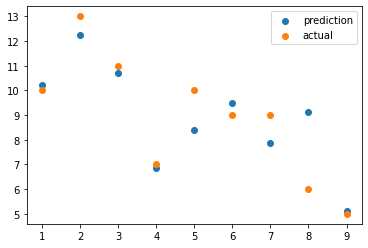

In [19]:
import matplotlib.pyplot as plt

xs = [1,2,3,4,5,6,7,8,9]
plt.scatter(xs, pred)
plt.scatter(xs, y)
plt.legend(['prediction', 'actual'])
plt.show()

### 2. MSE

In [50]:
def MSE(X, y, beta_hat):
    designX = np.hstack((X,np.ones((X.shape[0], 1))))
    
    y_pred = np.matmul(designX, beta_hat)
    mse = np.sum((y_pred - y) ** 2) / (y.shape[0] - X.shape[1] - 1) # 제곱합 / 자유도

    return mse

In [51]:
MSE(X, y, estimate_beta(X, y))

4.8467931687057275

### 3.MLE

#### 바구니 안에 파란구슬과 빨간구슬이 들어있을 때, 10개를 추출하여보니 파란구슬이 2개 빨간구슬이 8개가 추출되었습니다. 
#### 이때 바구니안에는 파란구슬과 빨간구슬이 각각 몇개있는지에 대해서 최대우도추정법을 이용해 논리적으로 설명해주세요. 
- 수식은 있어도 좋고 말로 풀어쓰셔도 좋습니다
- 추출은 복원추출을 전제로 합니다
- 글자수 제한은 없습니다. 많이 쓰라는 얘기가 아니라 정말 제한이 없습니다. 너무 부담가지고 쓰지마세요.

### 답안
- 바구니에 있는 전체 구슬의 합을 표본이라고 볼 수 있다.
- 따라서 문제에서 주어진 상황은 전체 표본에서 10개를 표본추출 했다고 생각할 수 있다.
- 바구니 안에는 파란구슬과 빨간구슬 두 종류만 들어 있기 때문에 구슬을 하나 선택하면 파랑 또는 빨강 두 개만 나온다.
- 각 구슬은 복원추출을 전제로 하므로 앞서 뽑은 구슬이 뒤 뽑기에 영향을 주지 않는다.
- 이와 같은 조건은 이항분포(베르누이 선택) 으로 볼 수 있다.

- 이항분포에서 추출한 문제 상황(파란 구슬 2개 빨간 구슬 8개)이 나올 확률을 구해 보자.
- 순서에 상관 없이 파랑 : 빨강 = 2 : 8 일 경우를 E라고 하겠다.
- 여기서 파란 구슬이 나올 확률을 `P` 라 하면

<img src="https://latex.codecogs.com/gif.latex?P(E|p)&space;=&space;10\mathbb{C}2&space;\cdot&space;p^2&space;\cdot&space;(1-p)^8" title="P(E|p) = 10\mathbb{C}2 \cdot p^2 \cdot (1-p)^8" />

으로 표현할 수 있다.

- 최대우도추정법을 사용해기 위해 이를 최대화하는 `p-hat` 을 찾는다.
- 계산의 편의를 위해 로그를 사용하여 계산하면 ..
<img src="https://latex.codecogs.com/gif.latex?logP(E|p)&space;=&space;log10\mathbb{C}2&space;&plus;&space;logp^2&space;&plus;&space;log(1-p)^8" title="logP(E|p) = log10\mathbb{C}2 + logp^2 + log(1-p)^8" />

이다.
- 이 함수가 최대값을 갖기 위해선 도함수가 0이어야 하므로, 미분해서 0이 되는 값을 구한다.
<img src="https://latex.codecogs.com/gif.latex?\frac{2}{p}&space;-&space;\frac{8}{1-p}&space;=&space;0" title="\frac{2}{p} - \frac{8}{1-8} = 0" />

- 이를 정리하여 `p`값을 구하면..
<img src="https://latex.codecogs.com/gif.latex?p&space;=&space;\frac{1}{5}" title="p = \frac{1}{5}" />

최대우도추정법에 따라서 `p=1/5` 일때 주어진 파란 구슬을 2개 뽑을 가능성이 가장 크다고 볼 수 있다.

따라서 바구니에 파란 구슬이 20%일때 표본처럼 나올 확률이 크다고 볼 수 있다